# Setup

In [2]:
# Scikit-Learn ≥0.20 is required
import sklearn

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# Part A: Split Dataset

## 1. Split a simple dataset.

In [53]:
# Generate a simple dataset which has 20 samples.
X1, y1 = np.arange(40).reshape((20, 2)), range(20)
print('Data: \n X1 =')
print(X1)
print('Label: \n y1 = ',list(y1))

Data: 
 X1 =
[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]
 [12 13]
 [14 15]
 [16 17]
 [18 19]
 [20 21]
 [22 23]
 [24 25]
 [26 27]
 [28 29]
 [30 31]
 [32 33]
 [34 35]
 [36 37]
 [38 39]]
Label: 
 y1 =  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [54]:
X1.shape

(20, 2)

### a) split into train/test set

sklearn.model_selection.train_test_split()

Ref: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X1_train, X1_test, y1_train, y1_test = train_test_split(
...     X1, y1, test_size=0.3, random_state=42)

In [57]:
X1_train.shape # 14/20 = 0.7

(14, 2)

In [59]:
X1_test.shape # 6/20 = 0.3 --> test_size = 0.3

(6, 2)

In [60]:
X1_train # 14 training samples

array([[22, 23],
       [ 6,  7],
       [36, 37],
       [32, 33],
       [26, 27],
       [ 4,  5],
       [18, 19],
       [38, 39],
       [ 8,  9],
       [24, 25],
       [14, 15],
       [20, 21],
       [28, 29],
       [12, 13]])

The order of training instances has been randomly changed, as Machine Learning algorithms may be sensitive to the order.

In [61]:
y1_train # 14 training labels

[11, 3, 18, 16, 13, 2, 9, 19, 4, 12, 7, 10, 14, 6]

In [62]:
X1_test # 6 test samples

array([[ 0,  1],
       [34, 35],
       [30, 31],
       [ 2,  3],
       [16, 17],
       [10, 11]])

In [63]:
y1_test # 6 test labels

[0, 17, 15, 1, 8, 5]

### b) split into train/valid/test set

Furthur split the training set in above example into

a training set and a test set

In [64]:
X1_train_tvt, X1_val_tvt, y1_train_tvt, y1_val_tvt = train_test_split(
...     X1_train, y1_train, test_size=0.2, random_state=42) # X1_train has 14 samples

In [65]:
X1_train_tvt.shape # 4 samples in training set

(11, 2)

In [66]:
X1_val_tvt.shape # 3 samples in validation set: 14*0.2=2.8

(3, 2)

## 2. Split MNIST dataset

**Warning:** since Scikit-Learn 0.24, `fetch_openml()` returns a Pandas `DataFrame` by default. To avoid this and keep the same code as in the book, we use `as_frame=False`.


The MNIST dataset is actually already split into a training set (the first 60,000
images) and a test set (the last 10,000 images):

In [69]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

In [70]:
X, y = mnist["data"], mnist["target"]
X.shape # all digit images in the dataset

(70000, 784)

In [71]:
y.shape

(70000,)

Step1: split the training set into training / test set

In [91]:
X2_train, X2_test, y2_train, y2_test = train_test_split(
...     X, y, test_size=0.4, random_state=42)

In [92]:
X2_train.shape 

(42000, 784)

In [93]:
X2_test.shape # 28000/70000 = 0.4 (test_size = 0.4)

(28000, 784)

Step2: furthur split the training set in above example into training and validation set.

Then the whole dataset will be split in to training/validation/test set.

In [94]:
X2_train_tvt, X2_valid_tvt, y2_train_tvt, y2_valid_tvt = train_test_split(
...     X2_train, y2_train, test_size=0.2, random_state=42)

In [95]:
X2_train_tvt.shape

(33600, 784)

In [96]:
X2_valid_tvt.shape #8400/42000 = 0.2 (test_size = 0.2)

(8400, 784)

# Part B: Evaluation Metrics

# Training a Binary classifier

Classify digit 5 and non-5

The MNIST dataset is actually already split into a training set (the first 60,000 images) and a test set (the last 10,000 images)

In [97]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:] # split into training/test set

In [19]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [20]:
print('X_train.shape:', X_train.shape)
print('y_train_5.shape:',y_train_5.shape)

X_train.shape: (60000, 784)
y_train_5.shape: (60000,)


In [21]:
y_train_5[:10] # Check training labels

array([ True, False, False, False, False, False, False, False, False,
       False])

In [22]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [23]:
some_digit = X[0]

In [24]:
sgd_clf.predict([some_digit])

array([ True])

In [25]:
print(y[0])# check its label... number 5! Correct!

5


In [26]:
sgd_clf.predict([X[1]])

array([False])

In [27]:
print(y[1]) # the label is ... number 0

0


# Performance Measures

## Measuring Accuracy Using Cross-Validation

In [28]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [30]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

#### cross_val_score() v.s. cross_val_predict()

cross_val_score():
Evaluate a score by cross-validation.

cross_val_predict(): generates cross-validated estimates for each input data point.

#### Confusion Matrix:

In [31]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [32]:
y_train_perfect_predictions = y_train_5  # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

#### Precision,  recall, and f1-score

In [33]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [34]:
cm = confusion_matrix(y_train_5, y_train_pred)
cm[1, 1] / (cm[0, 1] + cm[1, 1])

0.8370879772350012

In [38]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [35]:
cm[1, 1] / (cm[1, 0] + cm[1, 1])

0.6511713705958311

In [36]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [37]:
cm[1, 1] / (cm[1, 1] + (cm[1, 0] + cm[0, 1]) / 2)

0.7325171197343847

# ROC curves

In [58]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

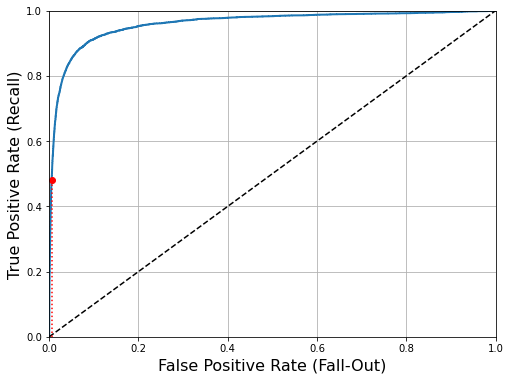

In [59]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           # Not shown
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   # Not shown
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  # Not shown
plt.plot([fpr_90], [recall_90_precision], "ro")               # Not shown
#save_fig("roc_curve_plot")                                    # Not shown
plt.show()

In [46]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

**Note**: we set `n_estimators=100` to be future-proof since this will be the default value in Scikit-Learn 0.22.

In [47]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

In [48]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

Saving figure roc_curve_comparison_plot


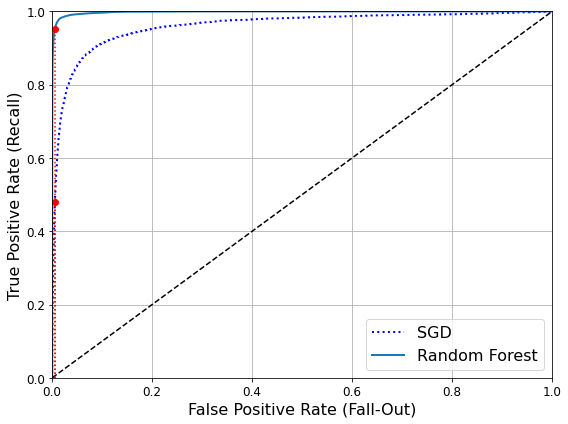

In [49]:
recall_for_forest = tpr_forest[np.argmax(fpr_forest >= fpr_90)]

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
plt.plot([fpr_90], [recall_90_precision], "ro")
plt.plot([fpr_90, fpr_90], [0., recall_for_forest], "r:")
plt.plot([fpr_90], [recall_for_forest], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
save_fig("roc_curve_comparison_plot")
plt.show()

In [50]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [51]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)

0.9905083315756169

In [52]:
recall_score(y_train_5, y_train_pred_forest)

0.8662608374838591